In [20]:
# Import libraries 
import numpy as np 
import pandas as pd 
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Import dataset 
df = pd.read_csv('/Users/prathamtekriwal/Desktop/new pro/Flight-Delay-Prediction/Data/Processed_data45.csv')  

In [21]:
df.head()

,year,month,day,carrier,origin,dest,delayed
0,2013,1,1,UA,EWR,IAH,0
1,2013,1,1,UA,LGA,IAH,0
2,2013,1,1,AA,JFK,MIA,0
3,2013,1,1,B6,JFK,BQN,0
4,2013,1,1,DL,LGA,ATL,0


In [22]:
columns= ['carrier','dest', 'origin']
le=LabelEncoder()
for i in columns:
     df[i]=le.fit_transform(df[i])

In [23]:
df['carrier'].unique()

array([11,  1,  3,  4,  5,  9, 12, 14, 13,  7,  2,  0,  6,  8, 15, 10])

In [24]:
df['origin'].unique()

array([0, 2, 1])

In [25]:
df['dest'].unique()

array([ 43,  57,  12,   4,  68,  35,  42,  53,  70,  99,  49,  89,  30,
        11,  48,  60,  32,  82,  91,  73,  16,  23,  14,  29,  94,  61,
        92, 103,  58,  88,  81,  98,  95,  79,  24,  47,  21,  55,  74,
        83,  28,  22,  96,  64,  46,  54,  40,  10,   5,  13,  72,  97,
        33,   6,  78,  45,  85,  19,  41,  51,  27,   2,   7,  56,  59,
        37,  26,  15,  80,  38,  36,  52,  69,  84,  87,  71,  90,  67,
        25,  65,  93, 102,  77,  31,  75, 100,   9,  66,  18,  39,  17,
        62,  34,  76,   1,   8,   0,  44,  63,  86,  50,  20, 101,   3])

In [26]:
X = df.iloc[:, 0:6].values # from column(years) to column(distance)
X[0:5]

array([[2013,    1,    1,   11,    0,   43],
       [2013,    1,    1,   11,    2,   43],
       [2013,    1,    1,    1,    1,   57],
       [2013,    1,    1,    3,    1,   12],
       [2013,    1,    1,    4,    2,    4]])

In [27]:
y = df['delayed']
y.head().to_frame()

,delayed
0,0
1,0
2,0
3,0
4,0


In [28]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.        , -1.63026283, -1.67941389,  1.17176495, -1.16692254,
        -0.20437424],
       [ 0.        , -1.63026283, -1.67941389,  1.17176495,  1.28675586,
        -0.20437424],
       [ 0.        , -1.63026283, -1.67941389, -1.24429715,  0.05991666,
         0.30070873],
       [ 0.        , -1.63026283, -1.67941389, -0.76108473,  0.05991666,
        -1.32277224],
       [ 0.        , -1.63026283, -1.67941389, -0.51947852,  1.28675586,
        -1.61139108]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (261876, 6) (261876,)
Test set: (65470, 6) (65470,)


In [30]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [31]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 0, 0, 0])

In [32]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8852930394537872
Test set Accuracy:  0.8642584389796854


In [33]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Acuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Acuracy:  0.8818410239960898
Test set Accuracy:  0.8665953872002444


In [34]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Acuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Acuracy:  0.8818410239960898
Test set Accuracy:  0.8665953872002444


In [35]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.80725523, 0.86248664, 0.84541011, 0.86425844, 0.85756835,
       0.86659539, 0.86251718, 0.86861158, 0.86599969])

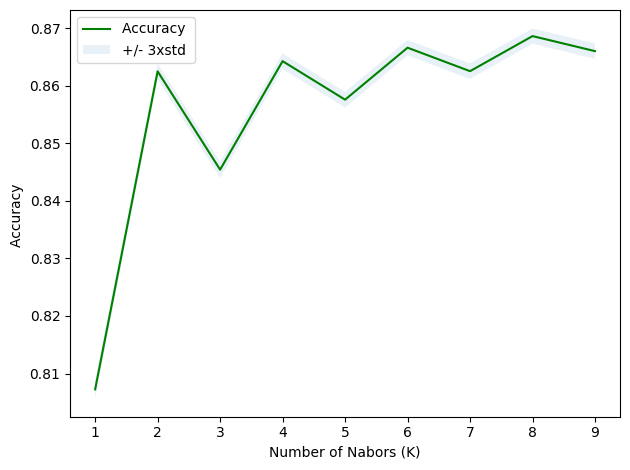

In [36]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [37]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8686115778219031 with k= 8


In [38]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     57053
           1       0.41      0.10      0.16      8417

    accuracy                           0.87     65470
   macro avg       0.65      0.54      0.54     65470
weighted avg       0.82      0.87      0.83     65470

